# Climate Analysis and Exploration


## * Import Dependencies

In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect, Column, Integer, String

In [18]:
# Start connection
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Create a session
session = Session(engine)
conn = engine.connect()

In [19]:
inspector = inspect(engine)

In [20]:
# List all tables
inspect(engine).get_table_names()

['measurement', 'station']

In [21]:
# Using the inspector to print the column names within the 'dow' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [22]:
# Using the inspector to print the column names within the 'dow' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [23]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [24]:
Base.classes.keys()

['measurement', 'station']

In [58]:
# Assign the measurement class to a variable called `Measurement`
M = Base.classes.measurement
M

sqlalchemy.ext.automap.measurement

In [59]:
# Query table and get first row
first_row = session.query(M).first()

# Print row as a dictionary
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x236c0f05490>,
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0,
 'station': 'USC00519397',
 'prcp': 0.08}

In [57]:
M_data = session.query(M.date, M.prcp).all()
M_data

[('2010-01-01', 0.08),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-06', None),
 ('2010-01-07', 0.06),
 ('2010-01-08', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-11', 0.01),
 ('2010-01-12', 0.0),
 ('2010-01-14', 0.0),
 ('2010-01-15', 0.0),
 ('2010-01-16', 0.0),
 ('2010-01-17', 0.0),
 ('2010-01-18', 0.0),
 ('2010-01-19', 0.0),
 ('2010-01-20', 0.0),
 ('2010-01-21', 0.0),
 ('2010-01-22', 0.0),
 ('2010-01-23', 0.0),
 ('2010-01-24', 0.01),
 ('2010-01-25', 0.0),
 ('2010-01-26', 0.04),
 ('2010-01-27', 0.12),
 ('2010-01-28', 0.0),
 ('2010-01-30', None),
 ('2010-01-31', 0.03),
 ('2010-02-01', 0.01),
 ('2010-02-03', None),
 ('2010-02-04', 0.01),
 ('2010-02-05', 0.0),
 ('2010-02-06', 0.0),
 ('2010-02-07', 0.0),
 ('2010-02-08', 0.0),
 ('2010-02-09', 0.0),
 ('2010-02-11', 0.0),
 ('2010-02-12', 0.02),
 ('2010-02-13', 0.01),
 ('2010-02-14', 0.0),
 ('2010-02-15', 0.0),
 ('2010-02-16', 0.0),
 ('2010-02-17', 0.0),
 ('2010-02-19', None),
 ('2010-02-20', 0

In [52]:
measure_date_count = session.query(Measurement.date).count()
measure_date_count

19550

In [73]:
data = session.query(M.date,M.prcp).filter(func.strftime("%m",M.date)).order_by(M.date.desc()).first()
data

('2017-08-23', 0.0)

In [87]:
data = session.query(M.date,M.prcp).filter(func.strftime("%m",M.date)).order_by(M.date.desc()).all()
len(data)

19550

In [88]:
k = (
    session
    .query(M.date)
    .filter(func.strftime("%m",M.date))
    .filter(M.date>'2016-08-01')
    .order_by(M.date.desc())
    .all()
)
len(k)

2366

In [96]:
k = (
    session
    .query(M.date,M.prcp)
    .filter(func.strftime("%m",M.date))
    .filter(M.date>'2016-08-01')
    .order_by(M.date.desc())
    .all()
)

In [106]:
df = pd.DataFrame(k, columns=['M.date', 'M.prcp'])
df.set_index('M.date', inplace=True,)
df

,M.prcp
M.date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00
...,...
2016-08-02,0.55
2016-08-02,0.00
2016-08-02,0.07


In [120]:
trim_df = df.replace(0,np.nan).dropna(axis=1,how="all")
final_df = t.dropna(how="all")
len(final_df)

1224

In [167]:
final_df.head()

,M.prcp
M.date,
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.50
2017-08-21,0.02
2017-08-21,0.56


In [171]:
#save data to file location
final_df.to_csv('./Resources/prcp_file.csv', index=False)

In [169]:
df_saved = pd.read_csv('new_data_file.csv')
df_saved  

,M.date,M.prcp
0,2017-08-23,0.08
1,2017-08-23,0.45
2,2017-08-22,0.50
3,2017-08-21,0.02
4,2017-08-21,0.56
...,...,...
1219,2016-08-02,0.20
1220,2016-08-02,0.55
1221,2016-08-02,0.07
1222,2016-08-02,0.83


<Figure size 1800x720 with 0 Axes>

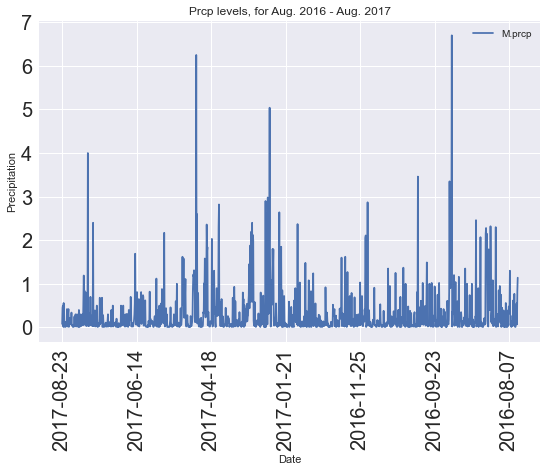

In [192]:
plt.figure(figsize=(25,10))
final_df.plot.line(title="Prcp levels, for Aug. 2016 - Aug. 2017", fontsize = 20, rot='90')
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.show()

In [ ]:
final_df = pd.DataFrame({'Date':['2016-08-23','2016-10-01','2016-11-09','2016-12-19','2017-01-28','2017-03-09','2017-04-18','2017-05-31','2017-07-10']})

In [ ]:
# Assign the station class to a variable called `Station`
Station = Base.classes.station

In [19]:
# Query table and get first row
first_row = session.query(Station).first()

# Print row as a dictionary
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1af636c7b50>,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'longitude': -157.8168}